In [92]:
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [8]:
data=pd.read_excel('광진구 실거래_변수ALL.xlsx',index_col=0)

In [14]:
data1 = data.drop(['도로명건물본번호코드', '도로명건물부번호코드', '도로명시군구코드',
       '도로명일련번호코드', '도로명코드','법정동본번코드', '법정동부번코드', '법정동시군구코드',
       '법정동읍면동코드', '법정동지번코드','일련번호', '지번', '지역코드'],axis=1)

In [26]:
A= data1.columns

'건축년도'

In [47]:
#data1['거래금액']=data1['거래금액'].str.replace(',','').astype('int64')
#data1['kospi']=data1['kospi'].str.replace(',','').astype('float64')
#data1['E_rate']=data1['E_rate '].str.replace(',','').astype('float64')
data1['A_benefit']=data1['A_benefit'].str.replace(',','').astype('int64')
data1['A_pop_all']=data1['A_pop_all'].str.replace(',','').astype('int64')
data1['A_pop_65']=data1['A_pop_65'].str.replace(',','').astype('int64')
#data1['E_rate']=data1['E_rate'].str.replace(',','').astype('float64')
#data1['E_GDP']=data1['E_GDP '].str.replace(',','').astype('int64')  
#data1['A_pop_for']=data1['A_pop_for '].str.astype('int64')

In [41]:
data1['A_pop_for']=data1['A_pop_for'].str.replace(',','').astype('float64')
data1['E_GDP']=data1['E_GDP'].str.replace(',','').astype('int64')  

In [48]:
data1.dtypes

거래금액            int64
건축년도            int64
년               int64
도로명            object
법정동            object
아파트            object
월               int64
일               int64
전용면적          float64
층               int64
location       object
lat           float64
lng           float64
행정동            object
행정동코드         float64
land_price      int64
법정동주소          object
D_hsch          int64
D_msch          int64
D_esch          int64
D_sub           int64
D_trans         int64
D_hos           int64
D_market        int64
D_library       int64
E_GDP           int64
E_grow        float64
E_CPI         float64
E_rent        float64
kospi         float64
E_rate        float64
A_benefit       int64
A_pop_all       int64
A_pop_65        int64
A_pop_for     float64
A_par_all       int64
A_par_apt       int64
brand           int64
Max_layer       int64
dtype: object

In [71]:
corr_matrix=data1.corr()
corr_matrix

,거래금액,건축년도,년,월,일,전용면적,층,lat,lng,행정동코드,...,kospi,E_rate,A_benefit,A_pop_all,A_pop_65,A_pop_for,A_par_all,A_par_apt,brand,Max_layer
거래금액,1.000000,0.043128,0.305561,0.082700,0.026411,0.784160,0.333245,-0.106445,0.151284,0.179126,...,0.291837,-0.010517,-0.258871,0.353426,0.380081,-0.189860,0.408650,0.429109,0.423551,0.447210
건축년도,0.043128,1.000000,-0.012041,-0.052445,-0.013613,0.004480,0.137635,-0.000724,-0.248649,-0.001566,...,-0.032123,0.032383,0.105130,-0.168647,-0.023078,0.118750,-0.084035,-0.075257,0.267978,0.199574
년,0.305561,-0.012041,1.000000,-0.065356,0.010226,0.035891,-0.004641,-0.025943,-0.034709,-0.000850,...,0.747002,0.311409,0.285073,-0.099844,0.580306,0.050288,0.359841,0.383410,0.009429,-0.014324
월,0.082700,-0.052445,-0.065356,1.000000,-0.009791,0.042499,0.033666,0.010327,0.047684,-0.013236,...,0.006697,0.038203,-0.068100,0.045621,-0.047044,-0.033422,-0.006411,-0.009837,0.009353,0.030503
일,0.026411,-0.013613,0.010226,-0.009791,1.000000,0.014468,0.005513,0.033125,0.001198,-0.022756,...,0.028171,-0.016332,0.014578,0.003705,0.008565,0.011729,-0.009199,-0.007738,0.005970,-0.000306
전용면적,0.784160,0.004480,0.035891,0.042499,0.014468,1.000000,0.199913,-0.073418,0.102519,0.179090,...,0.061241,-0.058468,-0.120878,0.147800,0.179091,-0.131996,0.144042,0.171870,0.267852,0.302426
층,0.333245,0.137635,-0.004641,0.033666,0.005513,0.199913,1.000000,-0.126636,-0.044016,0.151992,...,0.008640,-0.020825,-0.126273,0.067198,0.085935,-0.063124,0.132363,0.137457,0.297504,0.572872
lat,-0.106445,-0.000724,-0.025943,0.010327,0.033125,-0.073418,-0.126636,1.000000,0.282489,-0.517267,...,-0.017653,-0.013156,0.137200,-0.059296,-0.288256,-0.079035,-0.124050,-0.188462,0.025689,-0.224810
lng,0.151284,-0.248649,-0.034709,0.047684,0.001198,0.102519,-0.044016,0.282489,1.000000,0.083003,...,0.003083,-0.034555,-0.452358,0.612374,0.063307,-0.502965,0.399651,0.231507,-0.051304,-0.078307
행정동코드,0.179126,-0.001566,-0.000850,-0.013236,-0.022756,0.179090,0.151992,-0.517267,0.083003,1.000000,...,0.002104,0.011678,-0.104008,0.121195,0.572432,-0.169937,0.245701,0.331612,0.008001,0.254389


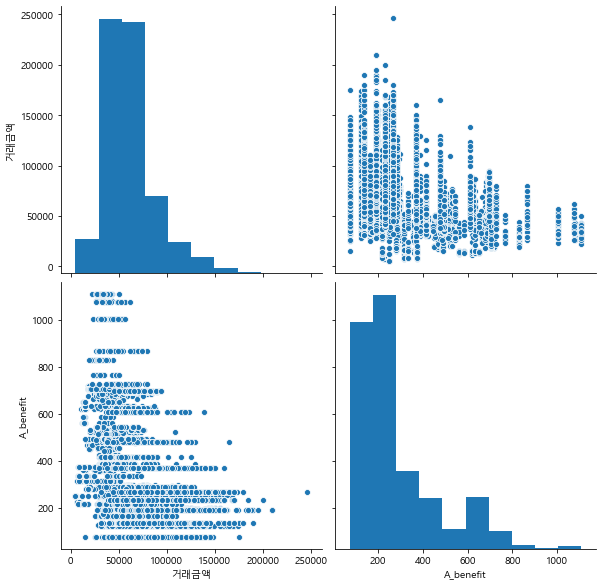

In [73]:
sns.pairplot(data1, vars=['거래금액','A_benefit'],size=4)

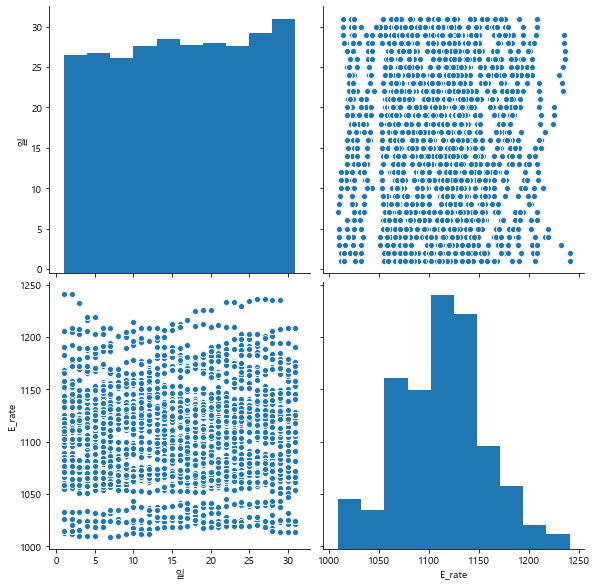

In [75]:
sns.pairplot(data1, vars=['일','E_rate'],size=4)

In [87]:
data1['날짜']=''

In [102]:
for i in range(len(data1)):
    data1.at[i,'날짜']=str(data1.at[i,'년'])+'-'+str(data1.at[i,'월'])+'-'+str(data1.at[i,'일'])
    data1.at[i,'날짜']=datetime.datetime.strptime(data1.at[i,'날짜'],"%Y-%m-%d").date()

In [127]:
for i in range(len(data1)):
    if data1['날짜'][i] > datetime.datetime.strptime('2015',"%Y").date():
        print(i)
        break
        

3083


In [128]:
data1['날짜'][3083]

datetime.date(2015, 1, 7)

<Figure size 1440x1440 with 0 Axes>

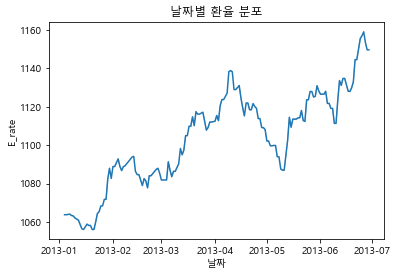

<Figure size 1440x1440 with 0 Axes>

In [130]:
sns.lineplot(x='날짜',y='E_rate',data=data1.loc[:600])
plt.title('날짜별 환율 분포')
plt.figure(figsize=(20,20)) # 2013 년 분포

<Figure size 1440x1440 with 0 Axes>

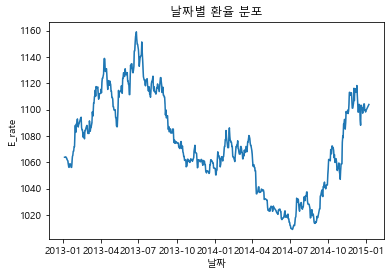

<Figure size 1440x1440 with 0 Axes>

In [129]:
sns.lineplot(x='날짜',y='E_rate',data=data1.loc[:3083])
plt.title('날짜별 환율 분포')
plt.figure(figsize=(20,20)) # 2014년 분포

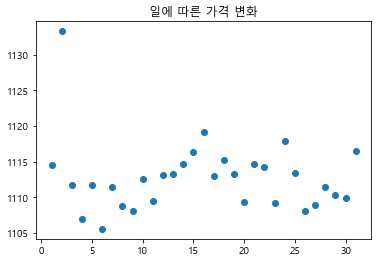

In [157]:
월=data1.groupby('일').E_rate.mean().reset_index()
plt.title('일에 따른 가격 변화')
plt.scatter(월['일'],월['E_rate'])

In [153]:
월.loc[0:3,'일']=1
월.loc[3:6,'일']=2
월.loc[6:9,'일']=3
월.loc[9:12,'일']=4
월.loc[12:15,'일']=5
월.loc[15:18,'일']=6
월.loc[18:21,'일']=7
월.loc[21:24,'일']=8
월.loc[24:27,'일']=9
월.loc[27:31,'일']=10

In [154]:
월=월.groupby('일').E_rate.mean().reset_index()

In [155]:
월

,일,E_rate
0,1,1119.834142
1,2,1108.112204
2,3,1109.457741
3,4,1111.737978
4,5,1114.741038
5,6,1115.778799
6,7,1112.449549
7,8,1113.815322
8,9,1110.166801
9,10,1112.060839


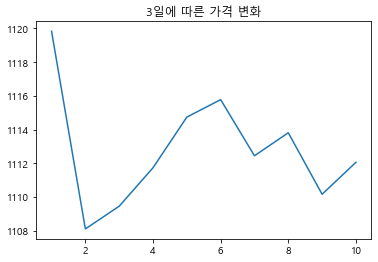

In [156]:
plt.title('3일에 따른 가격 변화')
plt.plot(월['일'],월['E_rate']) 